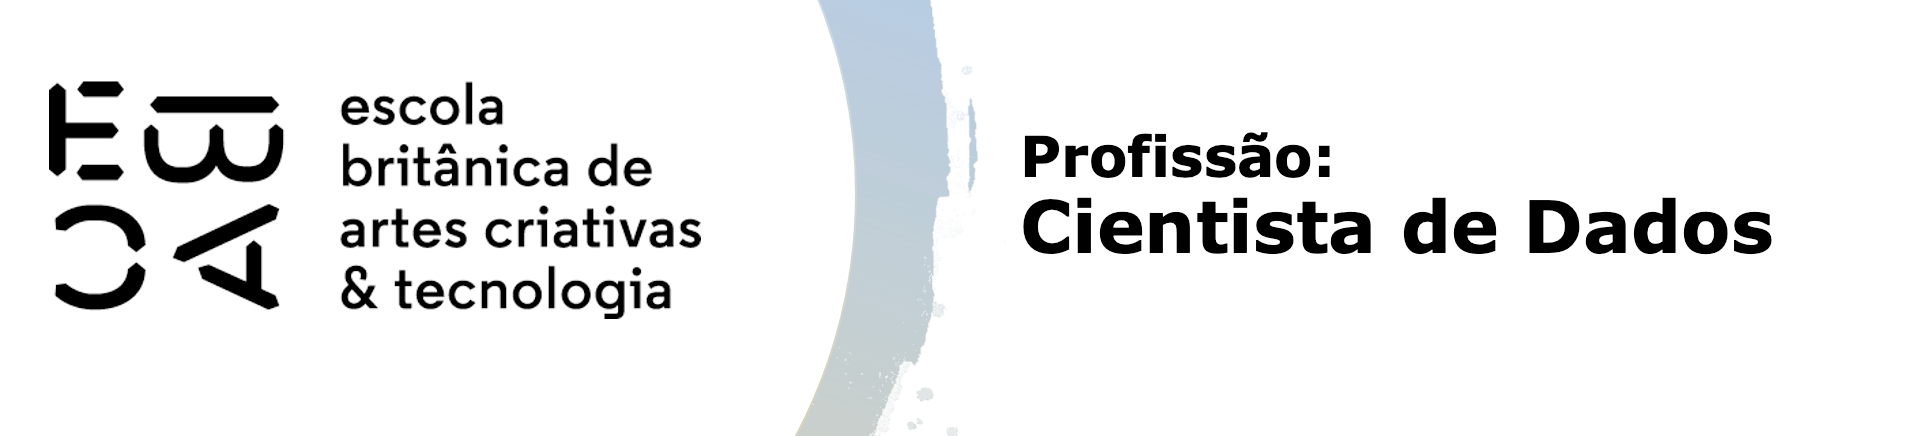

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('online_shoppers_intention.csv')

In [9]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [11]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

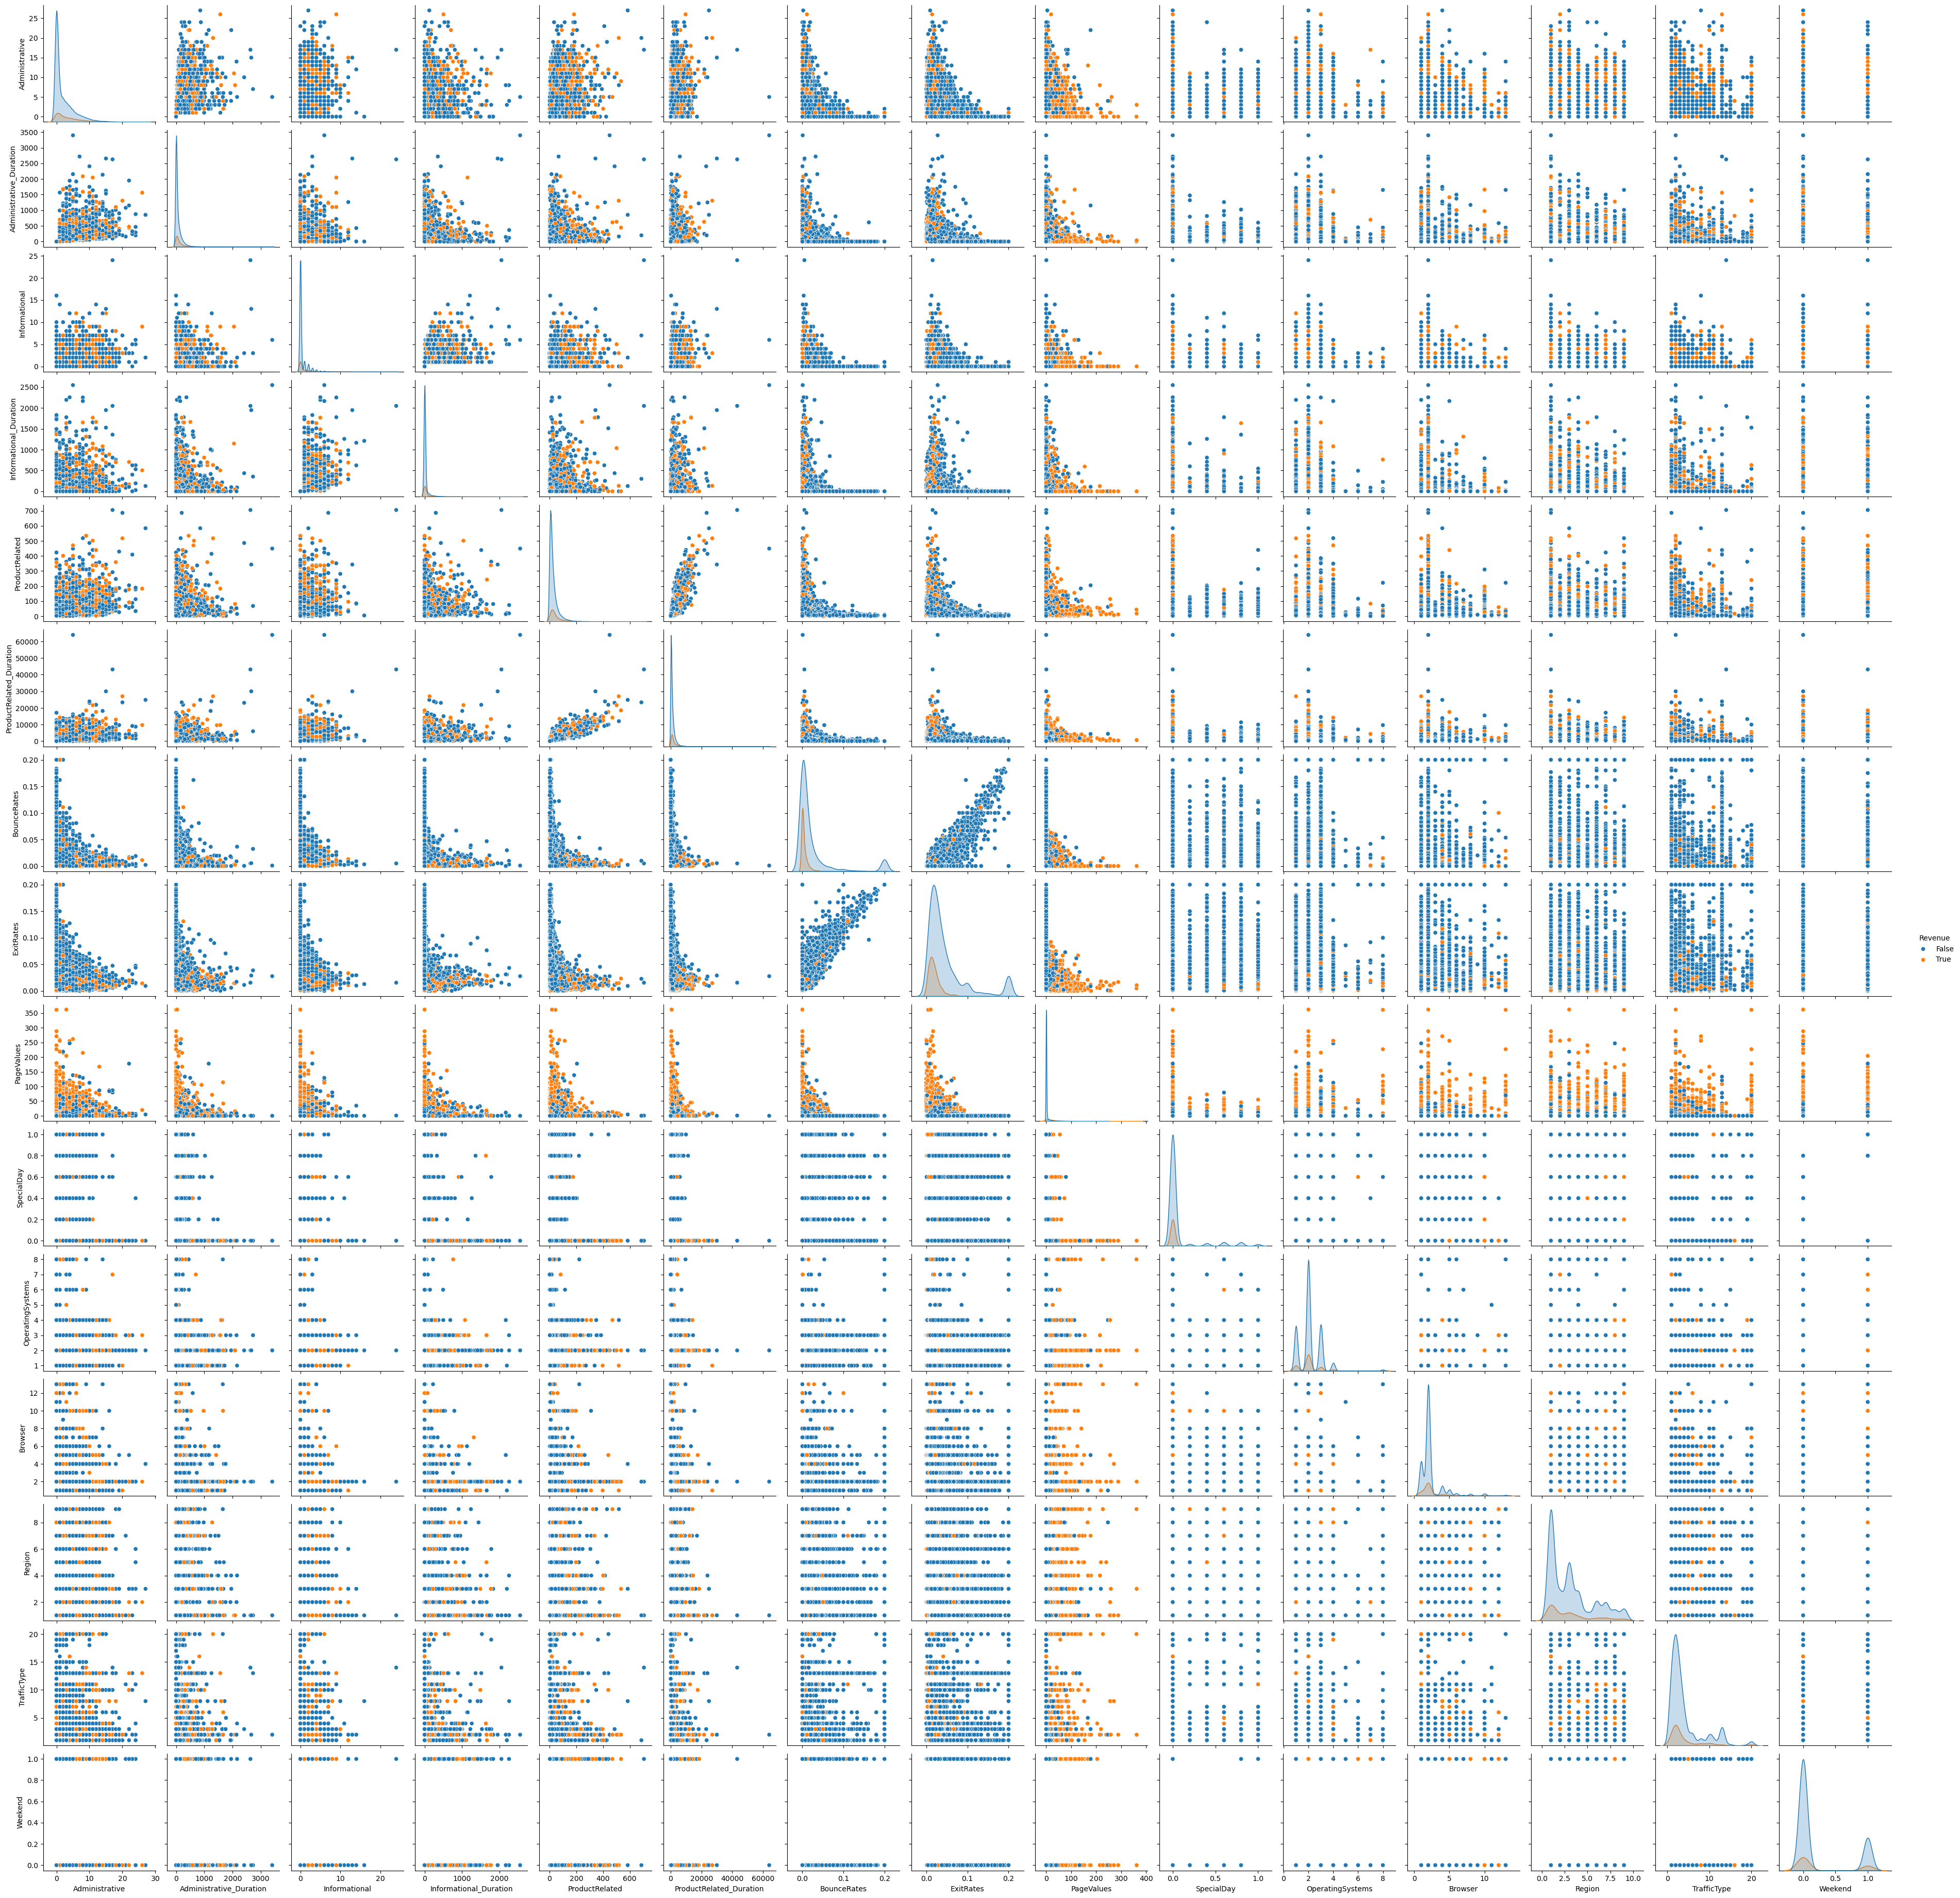

In [13]:
sns.pairplot(df, hue='Revenue')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [17]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [69]:
df.Month.value_counts()

Month
6    3364
7    2998
5    1907
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: count, dtype: int64

In [67]:
le = LabelEncoder()

df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = pd.Categorical(df['VisitorType'])
df['Weekend'] = pd.Categorical(df['Weekend'])
df['Revenue'] = pd.Categorical(df['Revenue'])

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [71]:
variaveis = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
             'BounceRates', 'ExitRates', 'PageValues']

var_data = ['Month']

## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [73]:
y = df.Revenue
X = df[variaveis + var_data]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

X_pad = pd.DataFrame(StandardScaler().fit_transform(X_train), columns = X_train.columns)

In [75]:
X_pad

Administrative  Administrative_Duration  Informational  \
0          -0.698788                -0.455966       -0.39824   
1          -0.698788                -0.455966       -0.39824   
2          -0.698788                -0.455966       -0.39824   
3          -0.698788                -0.455966       -0.39824   
4          -0.399289                -0.422411       -0.39824   
...              ...                      ...            ...   
9242       -0.698788                -0.455966       -0.39824   
9243       -0.698788                -0.455966       -0.39824   
9244        0.499208                -0.089096       -0.39824   
9245       -0.399289                 0.439958       -0.39824   
9246        1.697204                 0.170006       -0.39824   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                  -0.244744       -0.628763                -0.570898   
1                  -0.244744        0.524407                 0.267990   
2                  -0.244744       -0.425263                -0.441544   
3                  -0.244744       -0.696597                -0.612155   
4                  -0.244744       -0.153928                -0.012409   
...                      ...             ...                      ...   
9242               -0.244744       -0.583541                -0.374295   
9243               -0.244744       -0.244373                -0.312708   
9244               -0.244744       -0.153928                -0.318871   
9245               -0.244744       -0.425263                -0.417784   
9246               -0.244744       -0.425263                -0.173734   

      BounceRates  ExitRates  PageValues     Month  
0       -0.456067   0.153815   -0.317349  0.357254  
1        0.575112   0.604530   -0.317349  0.357254  
2       -0.456067  -0.727160   -0.317349 -1.330157  
3        3.725671   3.277272   -0.317349 -0.908304  
4       -0.281828  -0.106473   -0.317349  1.200960  
...           ...        ...         ...       ...  
9242    -0.456067  -0.540286   -0.317349 -1.330157  
9243     0.031803  -0.227941    0.940387  0.779107  
9244    -0.456067  -0.738601   -0.317349  0.779107  
9245    -0.456067  -0.639444   -0.317349  1.200960  
9246    -0.017980   0.279114   -0.317349 -0.908304  

[9247 rows x 10 columns]

In [83]:
clust1 = AgglomerativeClustering(linkage='complete', distance_threshold=None, n_clusters=3)
clust1.fit(X_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [90]:
X_train['grupop1'] = clust1.labels_

In [85]:
clust2 = AgglomerativeClustering(linkage='complete', distance_threshold=None, n_clusters=4)
clust2.fit(X_pad)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [92]:
X_train['grupop2'] = clust2.labels_

In [94]:
X_train

Administrative  Administrative_Duration  Informational  \
3709                0                     0.00              0   
4562                0                     0.00              0   
17                  0                     0.00              0   
7745                0                     0.00              0   
6168                1                     6.00              0   
...               ...                      ...            ...   
163                 0                     0.00              0   
11808               0                     0.00              0   
6012                4                    65.60              0   
6558                1                   160.20              0   
7115                8                   111.93              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
3709                      0.0               4                81.000000   
4562                      0.0              55              1728.025397   
17                        0.0              13               334.966667   
7745                      0.0               1                 0.000000   
6168                      0.0              25              1177.506667   
...                       ...             ...                      ...   
163                       0.0               6               467.000000   
11808                     0.0              21               587.916667   
6012                      0.0              25               575.816667   
6558                      0.0              13               381.616667   
7115                      0.0              13               860.770000   

       BounceRates  ExitRates  PageValues  Month  grupop1  grupop2  
3709      0.000000   0.050000    0.000000      6        0        0  
4562      0.049318   0.071645    0.000000      6        0        0  
17        0.000000   0.007692    0.000000      2        0        0  
7745      0.200000   0.200000    0.000000      3        0        0  
6168      0.008333   0.037500    0.000000      8        0        0  
...            ...        ...         ...    ...      ...      ...  
163       0.000000   0.016667    0.000000      2        0        0  
11808     0.023333   0.031667   23.332392      7        0        0  
6012      0.000000   0.007143    0.000000      7        0        0  
6558      0.000000   0.011905    0.000000      8        0        0  
7115      0.020952   0.056017    0.000000      3        0        0  

[9247 rows x 12 columns]

In [113]:
pd.crosstab(y_train, X_train['grupop1'])

grupop1     0  1   2
Revenue             
False    7813  3   0
True     1421  0  10

In [115]:
pd.crosstab(y_train, X_train['grupop2'])

grupop2     0  1   2   3
Revenue                 
False    7763  3   0  50
True     1389  0  10  32

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

Nos dois agrupamentos construidos, um com 3 grupos e outro com 4, apresentam o primeiro grupo como o grupo mais propenso à compras